# *WeRateDogs DAND Project*

## Table of Contents
<ul>
<li><a href="#1">Gathering Data</a></li>
<li><a href="#2">Assessing Data</a></li>
<li><a href="#3">Cleaning Data</a></li>
<li><a href="#4">Data Analysis</a></li>

</ul>

<a id='1'></a>
# Gathering Data

**In this step I gather the data needed for this analysis**

In [744]:
import requests
import numpy as np
import pandas as pd
import functools
import matplotlib.pyplot as plt
import seaborn as sb

## 1) twitter-archive-enhanced.csv

In [745]:
# first data set is twitter-archive-enhanced.csv that I have downloaded manually from the 
tw_ar_en = pd.read_csv("twitter-archive-enhanced.csv")
tw_ar_en.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2) twitter api data

In [752]:
# the sec datataframe is the j_df that contains valuable info about each tweet..this info has been pulled from the twitte api
# I just parsed the txt file that contain the json output to get this info
import json
with open('tweet-json.txt', 'r') as file:
    # reading the txt file line by line and storing it as a list element
    json_tweets = file.readlines()

# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
for tweet in json_tweets:
    j_obj=json.loads(tweet)
    tweet_id = j_obj["id"]
    time_stamp = j_obj["created_at"]
    retweet_count = j_obj["retweet_count"]
    favourite_count = j_obj["favorite_count"]
    
    # Append to list of dictionaries
    df_list.append({'tweet_id': tweet_id,
                        'time_stamp': time_stamp,
                        'retweet_count':retweet_count,
                         'favourite_count':favourite_count})
    
api_df = pd.DataFrame(df_list)


In [753]:
api_df.head()

,tweet_id,time_stamp,retweet_count,favourite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,8853,39467
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,6514,33819
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,4328,25461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,8964,42908
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,9774,41048


In [937]:
pip install tweepy

In [939]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tw_ar_en.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

## 3)image_predictions.tsv

In [760]:
# the third data frame is neural-network predictions to the object in the tweet photo
#let's first download the file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
open ('image_predictions.tsv','wb').write(r.content);


In [761]:
# making the data frame
prediction_df = pd.read_csv("image_predictions.tsv",sep='\t')

In [762]:
prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='2'></a>
# Assessing Data

**the second stage is detecting possible data quality & tidiness issues that need to be fixed through visual and programmatic assessment**

### visual assessment

`1` tw_ar_en

**By just scrolling in the dataframe I noticed the following issues**

`quality issues`
- incorrect structure of the source column 
- using the string None to represent missing values in the name column instead of np.nan


`tidiness issues`
- four columns (doggo	floofer	pupper	puppo) to represent the one variable (the dog stage)

`2` api_df

**By just scrolling in the dataframe I noticed the following issues**


`tidiness issues`
- the (retweet_count , favourite_count) columns should be added to the tw_ar_en observational unit


`3` prediction_df

**By just scrolling in the dataframe I noticed the following issues**

`quality issues`
- the predictions are separated with underscores and it would be better to remove them for readability sake

`tidiness issues`
- the best prediction column belongs to the tw_ar_en observational unit

### Programmatic assessment

`1` tw_ar_en

In [767]:
# Display the structure of the twitter archive dataframe
tw_ar_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [768]:
# display the uniqe values in the name column 
tw_ar_en["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

`quality issues`
- Erroneous datatypes for the id column and also for the timestamp column.
- tw_ar_en contains retweets.
- some names are invalid names like "all" , "O" , "a"...etc

`2` api_df

In [769]:
# Display the structure of the dataframe
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   int64 
 1   time_stamp       2354 non-null   object
 2   retweet_count    2354 non-null   int64 
 3   favourite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


`quality issues`
- Erroneous datatype for tweet_id column

**although the number of records in this dataframe is less than the tw_ar_en dataframe but I can't get these records from any other resource and given the size of these dataframes , those few records shouldn't bias the analysis.**

`3` prediction_df

In [770]:
# Display the structure of the dataframe
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Duplicate data

Here I check for duplicate data.

In [771]:
# Check for duplicate rows and tweet ids in each dataframe
dataframes = [tw_ar_en, api_df, prediction_df]
dataframe_names = ['tw_ar_en', 'api_df', 'prediction_df']

for df_name, df in zip(dataframe_names, dataframes):
    dataframe_dup_rows = df.duplicated().sum()
    dataframe_dup_ids = df.duplicated('tweet_id').sum()
    
    print("the {} dataframe contains {} duplicate rows and {} duplicate tweet IDs".format(df_name,dataframe_dup_rows,dataframe_dup_ids))

the tw_ar_en dataframe contains 0 duplicate rows and 0 duplicate tweet IDs
the api_df dataframe contains 0 duplicate rows and 0 duplicate tweet IDs
the prediction_df dataframe contains 0 duplicate rows and 0 duplicate tweet IDs


There don't appear to be any duplicated rows or tweet IDs in the `tw_ar_en', 'api_df', 'prediction_df`  dataframes.

#### Invalid or inaccurate data

Let's make use of the descripe function to detect possible invalid numeric data.

In [772]:
# Compute basic stats on rating_numerator and rating_denominator columns in tweet_data_archived
tw_ar_en[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


**from that summary statistcs we observe the following:**
- some tweets have a rating_numerator of 0 the same goes for the rating_denominator 0 which shouldn't be the case .
- the maximum value for the rating_numerator is 1776 which is insanly high ! even for the WeRateDogs special rating system

In [773]:
# Get of tweet with rating_denominator value of 0
invalid_tweet_text = tw_ar_en.loc[tw_ar_en.rating_denominator == 0, 'text'].tolist()[0]
print(invalid_tweet_text)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


The text of the tweet reveals that the _**WeRateDogs**_ account has provided an alternative rating that is both valid and in line with the rating system. Based on this tweet, there are likely to be more errors like this one where there are two ratings given in the tweet and the method used to extract the numerator and denominator of the ratings only does so for the first rating. In these cases determining the correct rating may not be as clear cut as the tweet shown here.

Continuing my exploration of the ratings columns, I'll take a random sample of entries from the `text` column to see whether or not this is a common occurrence.

In [774]:
# Get a random sample of 25 entries from the text column
text_sample = tw_ar_en.sample(25, random_state=12).text
text_sample_size = text_sample.size - 1
for i, entry in enumerate(text_sample):
    print(entry)
    if i != text_sample_size:
        print('----------')

This is CeCe. She's patiently waiting for Santa. 10/10 https://t.co/ZJUypFFwvg
----------
This is Beemo. He's a Chubberflop mix. 12/10 would cross the world for https://t.co/kzMVMU8HBV
----------
Touching scene here. Really stirs up the emotions. The bond between father &amp; son. So beautiful. 10/10 for both pups https://t.co/AJWJHov5gx
----------
This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu
----------
This is Toby. A cat got his tongue. 13/10 adorable af https://t.co/fHQrBKYSLC
----------
This is Buddy. He's photogenic af. Loves to sexily exit pond. Very striped. Comes with shield. 8/10 would pet well https://t.co/mYhQvAdV4f
----------
This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq
----------
RT @dog_rates: Please only send in dogs. We only rate dogs, not seemingly heartbroken ewoks. Thank you... still 10/10 would console https:/…
----------
Here we

Judging from this sample, it looks like these extremely large numerator and denominator values are likely to be quite rare. I can verify this by getting frequency counts of all of the values contained in both the `rating_numerator` and `rating_denominator` columns.

In [775]:
# Get value counts of rating_numerator column
tw_ar_en.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [776]:
# Get value counts of rating denominator column
tw_ar_en.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

The value counts show that extremely large values in the `rating_numerator` and `rating_denominator` columns are indeed rare which supports what I observed from the sample. Looking at the sample again, there is an entry that simply states that the account _**docmisterio**_ was created on 11/15/15.

In [777]:
# Display ratings corresponding to entry containing date
text_sample_mask = text_sample.str.contains('account')
junk_tweet_id = text_sample[text_sample_mask].index[0]
tw_ar_en.iloc[junk_tweet_id][['rating_numerator', 'rating_denominator']]

rating_numerator      11
rating_denominator    15
Name: 342, dtype: object

The ratings associated with this tweet seem to have come from the first two numbers of the date contained in the tweet. This is another indication that the method used to extract the ratings from the text of the tweets was rather basic and didn't take cases like the presence of dates or  multiple scores into account. It's likely that there are more errors like this in the `tw_ar_en` dataframe.

In [778]:
# Display the entire row of tweet containing junk data
tw_ar_en.iloc[junk_tweet_id]

tweet_id                                                     832088576586297345
in_reply_to_status_id                                               8.32088e+17
in_reply_to_user_id                                                 3.05821e+07
timestamp                                             2017-02-16 04:45:50 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                                   @docmisterio account started on 11/15/15
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             11
rating_denominator                                                           15
name                                    

Here, it's clear that this tweet doesn't actually contain any useful data and is essentially a "junk tweet" which can safely be removed from the `tw_ar_en` dataframe along with other occurrences that I may encounter.

`quality issues`
 - Some values in `rating_numerator` and `rating_denominator` taken from dates or, in the case of multiple scores, the wrong score
 - Single instance of 0 in `rating_denominator`
 - Some tweets don't contain useful data

In [779]:
# Compute basic stats on retweet_count and favorite_count columns in api_df 
api_df.describe()

,tweet_id,retweet_count,favourite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


**no suspecious stat result**

In [780]:
# Compute basic stats on the p*_conf columns of prediction_df
prediction_df[['img_num', 'p1_conf', 'p2_conf', 'p3_conf']].describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


**It would seem that there is no invalid data in any of the prediction confidence columns. All of the quartiles, the minimum, and the maximum values for each column fall squarely within the interval ${[0, 1]}$. This is in line with my expectations given that the values in these columns are probabilities. The `img_num` column appears to contain valid data as well as it can be seen from the minumum value that there are no negative numbers.**

In [781]:
# Check for strange characters and explicit 'None', 'NA', or 'N/A' encodings in the predicitons columns
# of prediction_df
for col in ['p1', 'p2', 'p3']:
    match_mask = prediction_df[col].str.match('(.*[^\'\w-].*|n(?:/?a|one)$)', case=False)
    matches = prediction_df[col].loc[match_mask]
    if matches.empty:
        print('There were no matches for column \'{}\''.format(col))
    else:
        print('There were matches for column \'{}\''.format(col))

There were no matches for column 'p1'
There were no matches for column 'p2'
There were no matches for column 'p3'


There doesn't appear to be any characters that aren't letters, underscores, hyphens, or apostrophes in any of the prediction columns. There also aren't any explicitly encoded 'None', 'NA', or 'N/A' strings like there were in the `name` column of the `tw_ar_en` dataframe.

### Summary of quality and tidiness issues

Here I've listed all of the quality and tidiness issues I found in the `tw_ar_en`, `api_df`, and `prediction_df` dataframes.

#### Quality

##### `tw_ar_en'
 - HTML tags in `source`
 - `name` contains words that are clearly not names
 - Missing data in `name` encoded as the string 'None'
 - Erroneous datatypes (`*_id`, `*timestamp`)
 - `tweet_data_archived` contains retweets
 - Some values in `rating_numerator` and `rating_denominator` taken from dates or, in the case of multiple scores, the wrong score
 - Single instance of 0 in `rating_denominator`
 - Some tweets don't contain useful data
 
##### `api_df`
 - Erroneous datatype for `tweet_id` column

##### `prediction_df`
 - Erroneous datatypes (`tweet_id`)
 - Words combined using underscore in `p1`, `p2`, and `p3`

#### Tidiness

##### `tw_ar_en`
 - One variable, the type of dog (e.g. `puppo`), spread over four columns

##### `api_df`
 - `retweet_count` and `favorite_count` should be part of `tweet_data_archived`
 
##### `prediction_df`
 - Correct predictions should be combined with `tweet_data_archived`

<a id='3'></a>
# Clean

cleaning the issues detected in the last step

In [782]:
# Create copies of the dataframes
tw_ar_en_clean = tw_ar_en.copy()
api_df_clean = api_df.copy()
prediction_df_clean = prediction_df.copy()

### Junk data

#### `tw_ar_en`: some tweets don't contain useful data

##### Define

Remove all rows that contain a string in the `text` column with the form `@user account started on MM/DD/YY` and reset the index of `tw_ar_en`

##### Code

In [783]:
junk_data_mask = tw_ar_en_clean.text.str.match('@.*account started.*\d{2}/\d{2}/\d{2}')
tw_ar_en_clean = tw_ar_en_clean[~junk_data_mask]
tw_ar_en_clean.reset_index(drop=True, inplace=True)

##### Test

In [784]:
clean_data_mask = tw_ar_en_clean.text.str.match('@.*account started.*\d{2}/\d{2}/\d{2}')
clean_data_matches = tw_ar_en_clean.text.loc[clean_data_mask]
print('Number of rows matching the regex: {}'.format(clean_data_matches.sum()))

Number of rows matching the regex: 0


### Tidiness

#### `tw_ar_en`: one variable, the type of dog (e.g. `puppo`), spread over four columns

##### Define 

Combine the `doggo`, `floofer`, `pupper`, and `puppo` columns into a single column called `dog_type` before dropping them. All 'None' strings will be converted to NaNs.

##### Code

In [785]:
# Replace None strings with empty strings
dog_type_cols = ['doggo', 'floofer', 'pupper', 'puppo']
tw_ar_en_clean[dog_type_cols] = tw_ar_en_clean[dog_type_cols].replace('None', '')

# Combine columns and convert empty strings to NaN
dog_type_col_data = [tw_ar_en_clean[col] for col in dog_type_cols]
tw_ar_en_clean['dog_type'] = functools.reduce(lambda col_main, col_add: col_main.str.cat(col_add, ', '), dog_type_col_data)
tw_ar_en_clean['dog_type'] = tw_ar_en_clean['dog_type'].str.strip(', ')
tw_ar_en_clean['dog_type'] = tw_ar_en_clean['dog_type'].apply(lambda x: x.replace(', ', '', x.count(',')-1))
tw_ar_en_clean['dog_type'] = tw_ar_en_clean['dog_type'].replace('', np.nan)

# Drop columns
tw_ar_en_clean = tw_ar_en_clean.drop(columns=dog_type_cols)

##### Test

In [786]:
# Check columns and datatype
tw_ar_en_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2355 non-null   int64  
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   timestamp                   2355 non-null   object 
 4   source                      2355 non-null   object 
 5   text                        2355 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2355 non-null   int64  
 11  rating_denominator          2355 non-null   int64  
 12  name                        2355 non-null   object 
 13  dog_type                    380 n

In [787]:
# Check that dog_type column contains correct values
tw_ar_en_clean.dog_type.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_type, dtype: int64

#### `api_df`: `retweet_count` and `favorite_count` should be part of `tw_ar_en`

##### Define

Merge `tw_ar_en` and `api_df` on `tweet_id` column.

##### Code

In [788]:
tw_ar_en_clean = pd.merge(tw_ar_en_clean,
                                     api_df_clean,
                                     how='left',
                                     on='tweet_id')

##### Test

In [789]:
tw_ar_en_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,time_stamp,retweet_count,favourite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,Tue Aug 01 16:23:56 +0000 2017,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Tue Aug 01 00:17:27 +0000 2017,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,Mon Jul 31 00:18:03 +0000 2017,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,Sun Jul 30 15:58:51 +0000 2017,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,Sat Jul 29 16:00:24 +0000 2017,9774.0,41048.0


#### `prediction_df`: correct predictions should be combined with `tw_ar_en`

##### Define

Extract the correct predictions from each prediction variable in such a way as to prefer the first prediction and combine these predictions with `tw_ar_en`.

##### Code

In [790]:
# Extract all of the correct predictions
image_pred_cols = prediction_df_clean.columns.tolist()
pred_col_pairs = [[image_pred_cols[i], image_pred_cols[i+2]] for i in
                  range(3, len(image_pred_cols), 3)]

dog_breeds_partial = []
for pred_col_pair in pred_col_pairs:
    p, p_dog = pred_col_pair
    tmp_pred = prediction_df_clean.loc[prediction_df_clean[p_dog] == True, ['tweet_id', p]]                                                        
    dog_breeds_partial.append(tmp_pred.rename(columns={p: 'dog_breed'}))
dog_breeds = pd.concat(dog_breeds_partial, ignore_index=True, sort=True)

# Combine correct predictions with tweet_data_archived
dog_breeds.drop_duplicates('tweet_id', inplace=True)
tw_ar_en_clean = pd.merge(tw_ar_en_clean, dog_breeds, on='tweet_id', how='left')

##### Test

In [791]:
tw_ar_en_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,time_stamp,retweet_count,favourite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,Tue Aug 01 16:23:56 +0000 2017,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Tue Aug 01 00:17:27 +0000 2017,6514.0,33819.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,Mon Jul 31 00:18:03 +0000 2017,4328.0,25461.0,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,Sun Jul 30 15:58:51 +0000 2017,8964.0,42908.0,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,Sat Jul 29 16:00:24 +0000 2017,9774.0,41048.0,basset


### Quality

#### `tw_ar_en`: erroneous datatypes (`*_id`, `*timestamp`)

##### Define

Convert each of the ID columns into strings and convert the timestamp columns into datetime.

##### Code

In [792]:
# Change id columns to string
id_col_names = [t_id for t_id in tw_ar_en_clean.columns.tolist() if 'id' in t_id]
for id_col_name in id_col_names:
    if tw_ar_en_clean[id_col_name].dtype == 'float64':
        tw_ar_en_clean[id_col_name] = tw_ar_en_clean[id_col_name].fillna(0)
        tw_ar_en_clean[id_col_name] = tw_ar_en_clean[id_col_name].astype(int)
    tw_ar_en_clean[id_col_name] = tw_ar_en_clean[id_col_name].astype(str)
    tw_ar_en_clean[id_col_name] = tw_ar_en_clean[id_col_name].replace('0', np.nan)

# Change timestamp columns to datetime
ts_col_names = [t_ts for t_ts in tw_ar_en_clean.columns.tolist() if 'timestamp' in t_ts]
for ts_col_name in ts_col_names:
    tw_ar_en_clean[ts_col_name] = pd.to_datetime(tw_ar_en_clean[ts_col_name])
#droping the other time_stamp column
tw_ar_en_clean=tw_ar_en_clean.drop(columns=['time_stamp'])

##### Test

In [793]:
tw_ar_en_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2354
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2355 non-null   object             
 1   in_reply_to_status_id       77 non-null     object             
 2   in_reply_to_user_id         77 non-null     object             
 3   timestamp                   2355 non-null   datetime64[ns, UTC]
 4   source                      2355 non-null   object             
 5   text                        2355 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2355 non-null   int64           

#### `tw_ar_en` contains retweets

##### Define

Remove all rows where `retweeted_status_id`. This will also take care of `retweeted_status_user_id` and `retweeted_status_timestamp` as both of these columns have values in the same rows as `retweeted_status_id`. Afterwards, reset the index.

##### Code

In [794]:
retweeted_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
retweeted_mask = tw_ar_en_clean.retweeted_status_id.notnull()

tw_ar_en_clean = tw_ar_en_clean[~retweeted_mask]
tweet_data_archived_retweet_test = tw_ar_en_clean.copy() # For testing
tw_ar_en_clean.drop(columns=retweeted_cols, inplace=True)
tw_ar_en_clean.reset_index(drop=True, inplace=True)

##### Test

In [795]:
# Make sure we deleted all of the retweets
tweet_data_archived_retweet_test.retweeted_status_id.notnull().sum()

0

In [796]:
# Make sure we removed all of the retweet columns
tw_ar_en_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favourite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,33819.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,25461.0,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964.0,42908.0,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774.0,41048.0,basset


#### `tw_ar_en`: `name` column contains words that are clearly not names

##### Define

Search for lowercase words in `name` column. In these rows extract the name of the dog by searching for the word 'name' and the string 'That is' in the text column. Replace the word with the names of the dogs. For the other rows without dog names set the word to NaN.

##### Code

In [797]:
# Get names by using a pattern with 'name'
new_names_n = (tw_ar_en_clean.text
                  .str.extract('name(?:d| is) (?P<real_name>[A-Z].*?)(?:\s|\.)'))

# Get names by using a pattern with 'That is'
new_names_t = (tw_ar_en_clean.text
                  .str.extract('That is (?P<real_name>.*?)\.'))
                  
# Replace all strings with lowercase words with NaN
names_nan_mask = tw_ar_en_clean.name.str.contains('^[a-z]',na=False)

tw_ar_en_clean.loc[names_nan_mask, 'name'] = np.nan
                  
# Combine new names columns with existing names column
tw_ar_en_clean['name'] = functools.reduce(lambda c_main, c_add: c_main.combine_first(c_add),                                                     [tw_ar_en_clean['name'],
                                                      new_names_n['real_name'],
                                                      new_names_t['real_name']])

##### Test

In [798]:
tw_ar_en_clean.loc[names_nan_mask, 'name']

21      NaN
53      NaN
147     NaN
167     NaN
282     NaN
       ... 
2167    NaN
2168    NaN
2170    NaN
2171    NaN
2172    NaN
Name: name, Length: 104, dtype: object

#### `tw_ar_en`: missing data in `name` encoded as the string 'None'

##### Define

Replace all instances of the string 'None' with NaN.

##### Code

In [799]:
tw_ar_en_clean.name = tw_ar_en_clean.name.replace('None', np.nan)

##### Test

In [800]:
tw_ar_en_clean.name.loc[tw_ar_en_clean.name == 'None'].sum()

0

#### `tw_ar_en`: HTML tags in `source` column

##### Define

Extract the name of the source platform from the HTML tags and replace the original values of the `source` column with them.

##### Code

In [801]:
platform_names = (tw_ar_en_clean.source.str.extract('>(.*?)<')
                  .rename(columns={0: 'platform_name'}))
tw_ar_en_clean['source'] = platform_names

##### Test

In [802]:
tw_ar_en_clean.source.value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### `tw_ar_en`: Some values in `rating_numerator` and `rating_denominator` taken from dates or, in the case of multiple scores, the wrong score.

##### Define

Find tweets with dates and multiple scores. For the tweets with dates, look for scores surrounding the dates and extract them. For the tweets with multiple scores, extract the first one but be mindful of the presence of numbers with decimal points in the numerator.

##### Code

In [803]:
# Look for dates
date_chk_pattern = '\d{1,2}/\d{1,2}/\d{1,2}'
date_ext_pattern_front = '(\d{1,3}(?:\.\d{1,3})?)/(\d{1,3}).*?' + date_chk_pattern
date_ext_pattern_back = date_chk_pattern + '.*?(\d{1,3}(?:\.\d{1,3})?)/(\d{1,3})'

# Performing this check since the junk tweets removed previously may have been the only
# rows with a date in the text column
col_names = ['rating_numerator', 'rating_denominator']
new_col_names = {0: 'rating_numerator', 1: 'rating_denominator'}
if tw_ar_en_clean.text.str.contains(date_chk_pattern).sum():
    # Extract scores
    front_scores = (tw_ar_en_clean.text.str.extract(date_ext_pattern_front)
                    .rename(columns=new_col_names))
    back_scores = (tw_ar_en_clean.text.str.extract(date_ext_pattern_back)
                   .rename(columns=new_col_names))
    
    # Get masks
    front_score_mask = front_score.rating_numerator.notnull()
    back_score_mask = back_score.rating_numerator.notnull()
    
    # Assign to tweet_data_archived
    tw_ar_en_clean.loc[front_score_mask, col_names] = (front_scores
                                                                  .loc[front_scores_mask])
    tw_ar_en_clean.loc[back_score_mask, col_names] = (back_scores
                                                                 .loc[back_scores_mask])
    print('Fixed issue of extracting dates instead of score.')
else:
    print('No dates.')

# Extract first score in tweets where there are multiple scores
mult_score_ext = '(\d{1,3}(?:\.\d{1,3})?)/(\d{1,3})'

mult_scores = (tw_ar_en_clean.text.str.extract(mult_score_ext)
               .rename(columns=new_col_names))
mult_scores_mask = mult_scores.rating_numerator.notnull()
tw_ar_en_clean.loc[mult_scores_mask, col_names] = mult_scores.loc[mult_scores_mask]

print('\nFixed issue of extracting the wrong score.')

No dates.

Fixed issue of extracting the wrong score.


##### Test

In [804]:
# Testing only for multiple scores since there were no date matches
if tw_ar_en_clean.loc[mult_scores_mask, col_names].equals(mult_scores.loc[mult_scores_mask]):
    print('Cleaning issue multiple scores successful')
else:
    print('Something went wrong')

Cleaning issue multiple scores successful


#### `tw_ar_en`:  single instance of 0 in `rating_denominator`

##### Define

Replace the score with the 0 in the denominator with the alternative score provided in the text of the tweet.

##### Code

In [805]:
ratings_cols = ['rating_numerator', 'rating_denominator']
new_ratings_names = {i: rating for i, rating in enumerate(ratings_cols)}
zero_denom_mask = tw_ar_en_clean.text.str.contains('/00')
new_ratings = tw_ar_en_clean.text.loc[zero_denom_mask].str.extract('/00.*?(\d{1,3})/(\d{1,3})')
tw_ar_en_clean.loc[zero_denom_mask, ratings_cols] = new_ratings.rename(columns=new_ratings_names)

##### Test

In [806]:
tw_ar_en_clean.loc[zero_denom_mask, ratings_cols]

,rating_numerator,rating_denominator
263,13,10


**the above two cleaning quests caused the 'rating_numerator' column to be object type so let's fix that**

In [807]:
tw_ar_en_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2174 non-null   object             
 1   in_reply_to_status_id  77 non-null     object             
 2   in_reply_to_user_id    77 non-null     object             
 3   timestamp              2174 non-null   datetime64[ns, UTC]
 4   source                 2174 non-null   object             
 5   text                   2174 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2174 non-null   object             
 8   rating_denominator     2174 non-null   object             
 9   name                   1414 non-null   object             
 10  dog_type               344 non-null    object             
 11  retweet_count          2174 non-null   float64          

In [808]:
tw_ar_en_clean['rating_numerator'] = tw_ar_en_clean['rating_numerator'].astype(float)

#### `prediction_df`: erroneous datatype for `tweet_id` column

##### Define

Change datatype of `tweet_id` column to string.

##### Code

In [809]:
prediction_df_clean['tweet_id'] = prediction_df_clean['tweet_id'].astype(str)

##### Test

In [810]:
assert prediction_df_clean.tweet_id.dtype == 'O', "'tweet_id' is not of type 'object'"

#### In `prediction_df` words combined using underscore in `p*` columns. Also the case in `tw_ar_en` with the `dog_breed` column.

##### Define

Replace the underscore separating the words in each of the `p*` columns in `prediction_df` as well as the `dog_breed` column in `tw_ar_en`.

##### Code

In [811]:
# Remove underscores p* columns of tweet_image_pred
p_cols = [p_col for p_col in prediction_df.columns.tolist() if
          'p' in p_col and '_' not in p_col]
for p_col in p_cols:
    prediction_df_clean[p_col] = prediction_df_clean[p_col].str.replace('_', ' ')
    
# Remove underscores in dog_breed column of tweet_data_archived
tw_ar_en_clean['dog_breed'] = tw_ar_en_clean['dog_breed'].str.replace('_', ' ')

##### Test

In [812]:
# Check tweet_image_pred
prediction_df_clean[p_cols].head(10)

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater Swiss Mountain dog
6,box turtle,mud turtle,terrapin
7,chow,Tibetan mastiff,fur coat
8,shopping cart,shopping basket,golden retriever
9,miniature poodle,komondor,soft-coated wheaten terrier


In [813]:
# Check tweet_data_archived
tw_ar_en_clean['dog_breed'].head(10)

0                         NaN
1                   Chihuahua
2                   Chihuahua
3          Labrador retriever
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: dog_breed, dtype: object

## Final cleaned dataset

After the cleaning step I'm left with a single master dataframe: `tw_ar_en_clean`. The last thing that I'll do is store it in an appropriately named dataframe and export it to the current working directory.

In [814]:
tw_ar_master = tw_ar_en_clean.copy()

out_file = 'tw_ar_master.csv'
tw_ar_master.to_csv(out_file, index=False)

<a id='4'></a>
## Analysis

Now that I've cleaned the data, I can begin deriving insights from the data about the _**WeRateDogs**_ account and the tweets that they've made. Since this analysis does include the creation of visualizations, I'll first load the necessary libraries.

In [815]:
# taking alook at the final_cleaned dataframe before jumping into the analysis process
tw_ar_en_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favourite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853.0,39467.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514.0,33819.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328.0,25461.0,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964.0,42908.0,Labrador retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774.0,41048.0,basset


In [816]:
tw_ar_en_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2174 non-null   object             
 1   in_reply_to_status_id  77 non-null     object             
 2   in_reply_to_user_id    77 non-null     object             
 3   timestamp              2174 non-null   datetime64[ns, UTC]
 4   source                 2174 non-null   object             
 5   text                   2174 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2174 non-null   float64            
 8   rating_denominator     2174 non-null   object             
 9   name                   1414 non-null   object             
 10  dog_type               344 non-null    object             
 11  retweet_count          2174 non-null   float64          

# `1` What is the top rated dog_breed? 

**I think its the first question that will pop on anybdody's head when they know about Weratedogs account is : what is most loved dog breed between the bloggers of this account?**


**Limitation: only 70% of the records have dog breed section so the result of the analysis will subjected to this limits**

In [817]:
# first let's group by the 'dog_breed' numerator column 
# then calculate the average rate for each breed and sorting them descendingly
top_rated_breeds = tw_ar_en_clean.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False)

In [818]:
# scores of the top ten breeds
top_ten_rates=top_rated_breeds.values[:10]

In [819]:
# the names of the top ten breeds
top_ten_breeds=top_rated_breeds.index[:10]

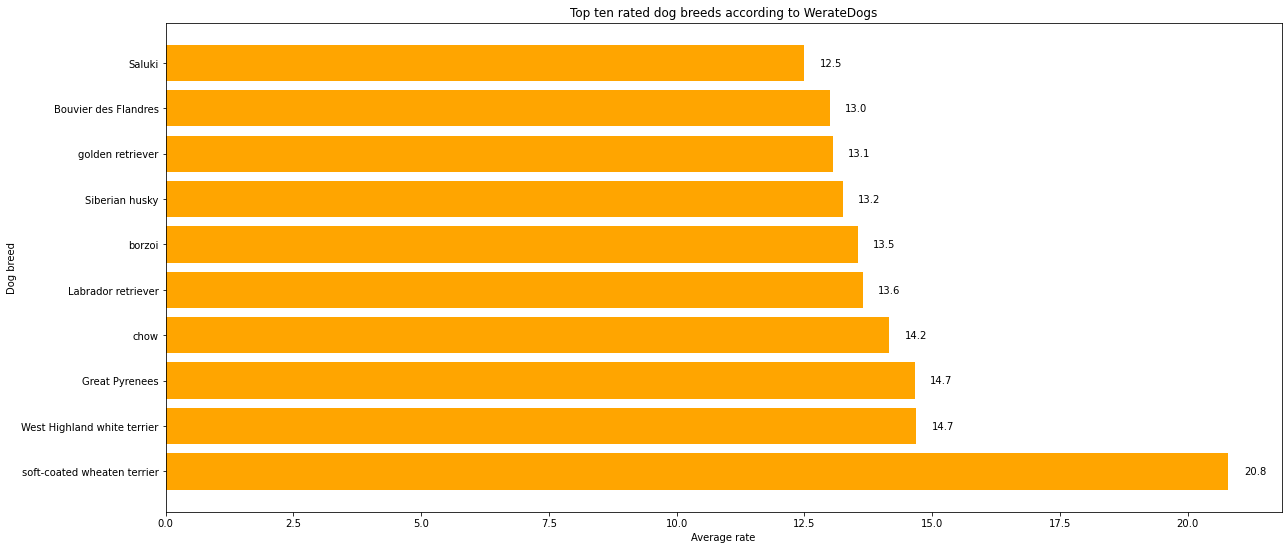

In [820]:
fig = plt.figure(figsize = (20, 9))
plt.barh(top_ten_breeds, top_ten_rates ,color='orange');
plt.ylabel('Dog breed')
plt.xlabel('Average rate')
plt.title('Top ten rated dog breeds according to WerateDogs');
# Logic to print the average rate on each bar
for i in range (len(top_ten_rates)):
    # Convert the average rate into string
    pct_string = '{:0.1f}'.format(top_ten_rates[i])
    # Print the string value on the bar. 
    plt.text(top_ten_rates[i]+0.3, i, pct_string, va='center')

## Conclusion

**From the above visualization it appears that "soft-coated wheaten terrier" breed beat all the other breeds with an average score of 20.8 ! .. no doubt they're cute,funny and adorable dogs.**

# `2` What is the most loved breed by the followers

**now let's see which is the most breed the followers interact with in terms of retweet_count and favourite_count.** 

In [821]:
tw_ar_en_clean.groupby('dog_breed')['favourite_count'].mean().sort_values(ascending=False)

dog_breed
Saluki                  24060.000000
Bedlington terrier      21153.166667
French bulldog          18416.806452
Bouvier des Flandres    18032.000000
Afghan hound            17326.666667
                            ...     
Tibetan terrier          1841.000000
Irish wolfhound          1534.000000
Japanese spaniel         1362.000000
groenendael              1156.500000
Brabancon griffon         885.000000
Name: favourite_count, Length: 113, dtype: float64

In [822]:
# favourite_count
# first let's group by the 'dog_breed' numerator column 
# then calculate the average favourite_count for each breed and sorting them descendingly
top_favourited_breeds = tw_ar_en_clean.groupby('dog_breed')['favourite_count'].mean().sort_values(ascending=False)

In [823]:
# scores of the top favourited breeds
top_favourited_rates=top_favourited_breeds.values[:10]

In [824]:
# the names of the top favourited breeds
top_favourited_breeds_names=top_favourited_breeds.index[:10]

In [825]:
# retweet_count
# first let's group by the 'dog_breed' numerator column 
# then calculate the average retweet_count for each breed and sorting them descendingly
top_retweeted_breeds = tw_ar_en_clean.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending=False)

In [826]:
# scores of the top retweeted breeds
top_retweeted_rates=top_retweeted_breeds.values[:10]

In [827]:
# the names of the top retweeted breeds
top_retweeted_breeds_names=top_retweeted_breeds.index[:10]

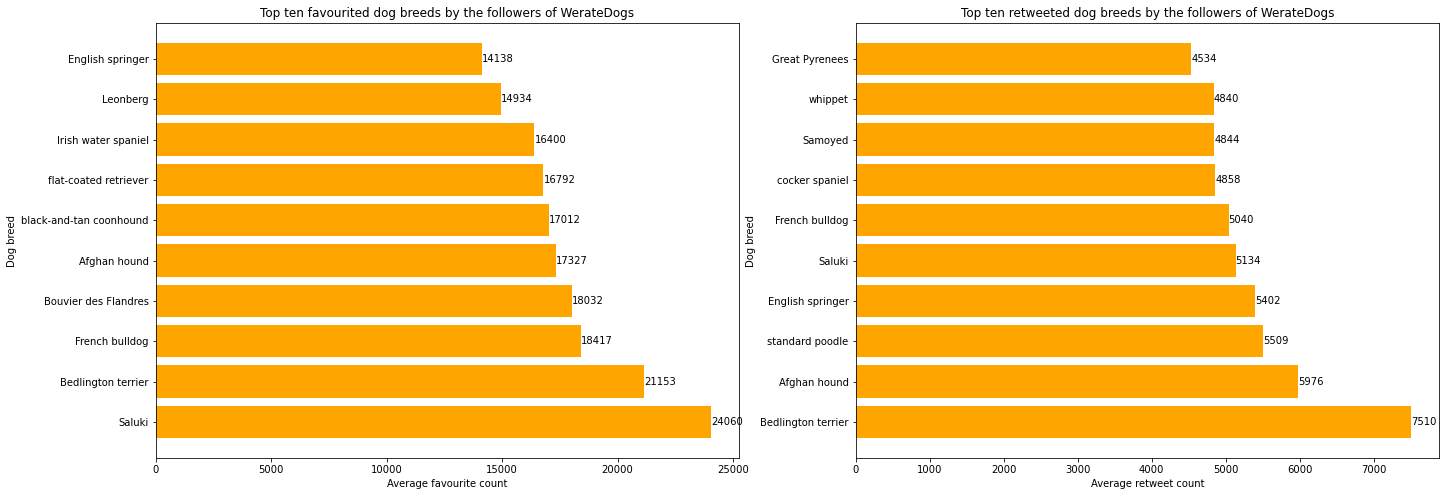

In [828]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [23, 8]) 


# 1 row, 2 cols,subplot 1
plt.subplot(1, 2, 1) 
plt.barh(top_favourited_breeds_names, top_favourited_rates ,color='orange');
plt.ylabel('Dog breed')
plt.xlabel('Average favourite count')
plt.title('Top ten favourited dog breeds by the followers of WerateDogs');
# Logic to print the average favourite_count on each bar
for i in range (len(top_favourited_rates)):
    # Convert the favourite_count into string
    pct_string = '{:0.0f}'.format(top_favourited_rates[i])
    # Print the string value on the bar. 
    plt.text(top_favourited_rates[i]+0.3, i, pct_string, va='center')

    
# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2)
plt.barh(top_retweeted_breeds_names, top_retweeted_rates ,color='orange');
plt.ylabel('Dog breed')
plt.xlabel('Average retweet count')
plt.title('Top ten retweeted dog breeds by the followers of WerateDogs');
# Logic to print the average retweet_count on each bar
for i in range (len(top_retweeted_rates)):
    # Convert the retweet_count into string
    pct_string = '{:0.0f}'.format(top_retweeted_rates[i])
    # Print the string value on the bar. 
    plt.text(top_retweeted_rates[i]+0.3, i, pct_string, va='center')





## Conclusions 
**From the visualization above we conclude the following:**


**- the "Saluki" breed appears to be the most favourited with an averge favourite count of 24060 and "Bedlington terrier" is the most retweeted breed with an average retweet count of 7510**


**- there are five common breeds between the top ten favourited & retweeted breeds .. 'French bulldog' 'Saluki' 'English springer' 'Afghan hound' 'Bedlington terrier'.. so these breeds are the ones that the followers interact with the most.**


it's important to do such analysis so the account bloggers have a clue about the taste of their audience so the can focus on those breeds to increase the engagement with the followers

# `3` What's the most common name?

**Although that when somebody name their dog it will come as an inspiration of their unique life , it will be nice to see if there's a common name between the dogs in our data frame**

In [829]:
dogs_names = tw_ar_en_clean.groupby('name')['tweet_id'].count().sort_values(ascending=False)

In [830]:
most_common_ten_names_freq=dogs_names.values[:10]

In [831]:
most_common_ten_names=dogs_names.index[:10]

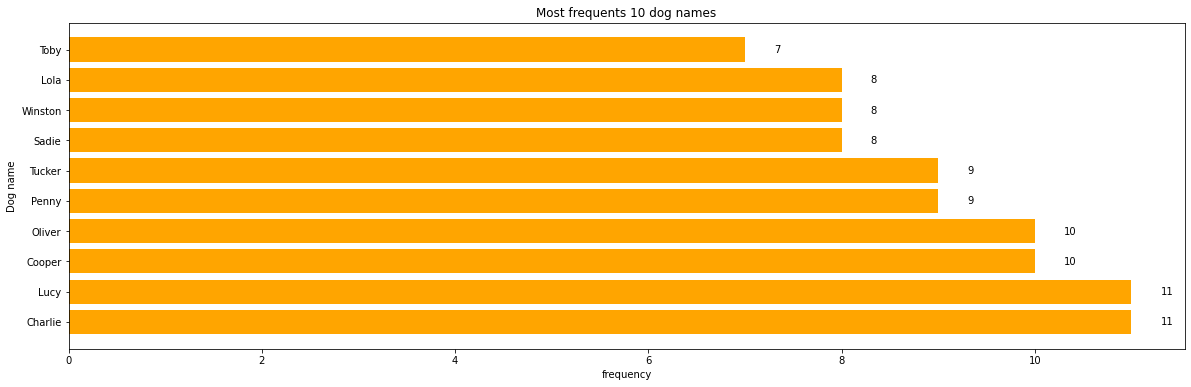

In [832]:
fig = plt.figure(figsize = (20, 6))
plt.barh(most_common_ten_names, most_common_ten_names_freq ,color='orange');
plt.ylabel('Dog name')
plt.xlabel('frequency')
plt.title('Most frequents 10 dog names');
for i in range (len(most_common_ten_names_freq)):
    pct_string = str(most_common_ten_names_freq[i])
    plt.text(most_common_ten_names_freq[i]+0.3, i, pct_string, va='center')

## Conclusion
**- "Charlie" and "Lucy" are the most "common" names with 11 occurrences each..but the intersting thing is the most ten common names have a frequency range between 11:7 and that very low given the size of the dataframe so that support our opinion before conducting this analysis that dog names tend to be unique because everybody name their dog after something from their own life** 

# `4` The tweets frequency vs the followers interaction over time

**Let's see the number of tweets the blogers of WeRateDogs made every month and how many favourites and retweets they got every month and see if we learn something**

In [833]:
#since august 2017 has only two observations .. let's drop this two to have a fair comparison between the different months
tw_ar_en_clean = tw_ar_en_clean.drop([0,1])

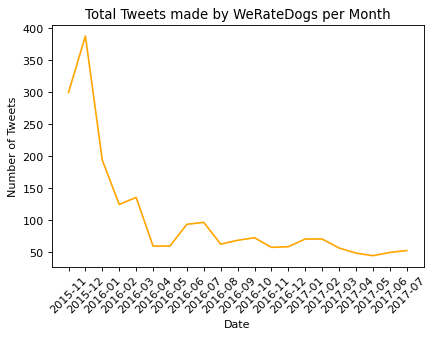

In [856]:
# Prepare tweet_archive for plotting
tw_ar_en_clean['year_months_date'] = tw_ar_en_clean['timestamp'].dt.year.astype(str) + '-' + \
                                            tw_ar_en_clean['timestamp'].dt.month.astype(str).str.pad(2, fillchar='0')
tw_ar_en_clean['is_tweet'] = np.where(tw_ar_en_clean.tweet_id.notnull(), 1, 0)

# Get required data 
twitter_archive_monthly_tweets = tw_ar_en_clean.groupby('year_months_date').is_tweet.sum().reset_index()
favourites_through_months = tw_ar_en_clean.groupby('year_months_date').favourite_count.sum()
retweets_through_months = tw_ar_en_clean.groupby('year_months_date').retweet_count.sum()


# Plot the data
plt.figure(dpi=80);
plt.xticks(rotation=45);
ax = sb.lineplot(x='year_months_date', y='is_tweet', data=twitter_archive_monthly_tweets,color='orange');
ax.set_title('Total Tweets made by WeRateDogs per Month');
ax.set_xlabel('Date');
ax.set_ylabel('Number of Tweets');








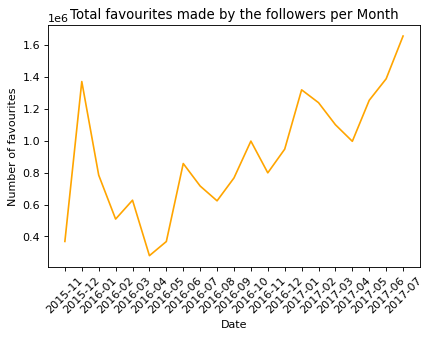

In [857]:
# Plot the data
plt.figure(dpi=80);
plt.xticks(rotation=45);
ax = sb.lineplot(x='year_months_date', y=favourites_through_months.values, data=twitter_archive_monthly_tweets,color='orange');
ax.set_title('Total favourites made by the followers per Month');
ax.set_xlabel('Date');
ax.set_ylabel('Number of favourites');

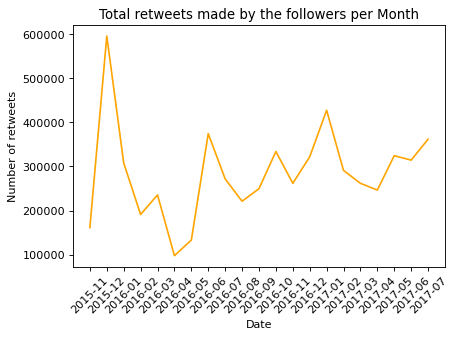

In [858]:
# Plot the data
plt.figure(dpi=80);
plt.xticks(rotation=45);
ax = sb.lineplot(x='year_months_date', y=retweets_through_months.values, data=twitter_archive_monthly_tweets,color='orange');
ax.set_title('Total retweets made by the followers per Month');
ax.set_xlabel('Date');
ax.set_ylabel('Number of retweets');



## Conclusion
**From the 3 visualizations above we see that at the early months of the account the bloggers did a plenty of work and tweeted the maximum amount of tweets per months through the time segment under investigations and that makes sense because at that time they wanted to get notice so they tweeted as much as they can. and we also can see that the early months work paid of as there is a peak in both the favourite and the retweet count at these early months .. of course that responce kept them motivated.**


**As the time goes by the amount of tweets for each month decreases but the amount of favourites and retweets increases and that also makes sense after the huge success of their early months they must have gone viral and got a huge fan base so the amount of retweets and favourites increases** 